In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import metrics

In [3]:
Dataset = pd.read_csv(r"C:\Users\HP\Downloads\diabetes.csv")
Dataset
Dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
Dataset.head()
Dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
Datasetnew = Dataset[['Glucose','BloodPressure','Age','Outcome']]
Datasetnew

,Glucose,BloodPressure,Age,Outcome
0,148,72,50,1
1,85,66,31,0
2,183,64,32,1
3,89,66,21,0
4,137,40,33,1
...,...,...,...,...
763,101,76,63,0
764,122,70,27,0
765,121,72,30,0
766,126,60,47,1


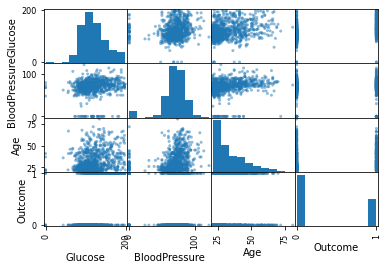

In [6]:
#Visualization of the Dataset 
scatter_matrix(Datasetnew)
pyplot.show()

In [7]:
A = Datasetnew[Datasetnew.Outcome == 1]
B = Datasetnew[Datasetnew.Outcome == 0]

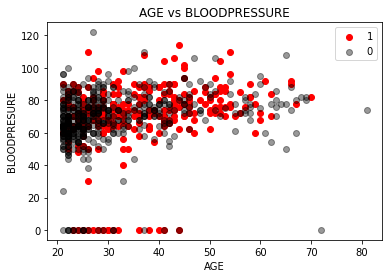

In [8]:
plt.scatter(A.Age,A.BloodPressure,color = "red",label = "1",alpha = 1)
plt.scatter(B.Age,B.BloodPressure,color = "black",label = "0",alpha =0.4)
plt.xlabel("AGE")
plt.ylabel("BLOODPRESURE")
plt.title("AGE vs BLOODPRESSURE")
plt.legend()
plt.show()

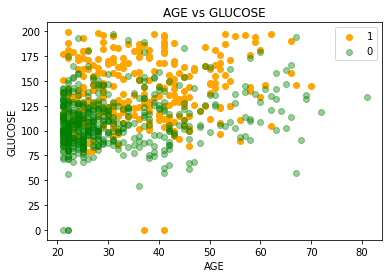

In [9]:
plt.scatter(A.Age,A.Glucose,color = "orange",label = "1",alpha = 1)
plt.scatter(B.Age,B.Glucose,color = "green",label = "0",alpha = 0.4)
plt.xlabel("AGE")
plt.ylabel("GLUCOSE")
plt.title("AGE vs GLUCOSE")
plt.legend()
plt.show()

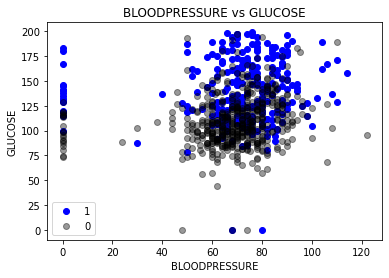

In [10]:
plt.scatter(A.BloodPressure,A.Glucose,color = "blue",label = "1",alpha = 1)
plt.scatter(B.BloodPressure,B.Glucose,color= "black",label = "0",alpha = 0.4)
plt.xlabel("BLOODPRESSURE")
plt.ylabel("GLUCOSE")
plt.title("BLOODPRESSURE vs GLUCOSE")
plt.legend()
plt.show()

In [11]:
x = Dataset.iloc[:,:-1]
y = Dataset.iloc[:,-1]

In [12]:
x_train, x_test, y_train ,y_test = train_test_split(x,y, random_state=0,test_size = 0.2)

In [16]:
print('********************using decision tree algorithm******************')
c = tree.DecisionTreeClassifier()
c.fit(x_train,y_train)
accu_train = np.sum(c.predict(x_train)==y_train)/float(y_train.size)
accu_test = np.sum(c.predict(x_test)==y_test)/float(y_test.size)
print('Classification accuracy on train',(accu_train)*100)
print('classification accuracy on test',(accu_test)*100)

********************using decision tree algorithm******************
Classification accuracy on train 100.0
classification accuracy on test 75.32467532467533


In [15]:
print('************************using linear regression algorithm********************')
model_LR = LinearRegression()
model_LR.fit(x_train,y_train)
LR_score_train = model_LR.score(x_train,y_train)
print("Train Accuracy :",LR_score_train)
LR_score_test = model_LR.score(x_test,y_test)
print("Test Accuracy :",LR_score_test)
predictions_LR = model_LR.predict(x_test)
print('MAE:',metrics.mean_absolute_error(y_test,predictions_LR))
print('MSE:',metrics.mean_squared_error(y_test,predictions_LR))
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions_LR))
print('RMSE:',LR_RMSE)

************************using linear regression algorithm********************
Train Accuracy : 0.2951381419161917
Test Accuracy : 0.32230203252064205
MAE: 0.3193161056243205
MSE: 0.14370648838141725
RMSE: 0.37908638643641274
